### Plot edge-encoding networks

In [1]:
# Libraries
library(ggraph)
library(ggpubr)
library(igraph)
library(tidyverse)
library(repr)
library(RColorBrewer)

Loading required package: ggplot2


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


── Attaching packages ────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ───────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::as_data_frame() masks tibble::as_data_frame(), igraph::as_data_frame()
✖ purrr::compose()       masks igraph::compose()
✖ tidyr::crossing()      masks igraph::crossing()
✖ dplyr::filter()        masks stats::filter()
✖ dplyr::groups()        masks igraph::groups()
✖ dplyr::lag()           masks stats::lag()
✖ purrr::simplify()      masks igraph::simplify()



#### Loading data

In [2]:
root = "/home/vinicius/funcog/gda" 
results = "/home/vinicius/storage1/projects/GrayData-Analysis/figures/edge_encoding"

df_coh = read.csv(
  paste(
    c(root,
      "/Results/lucy/mutual_information/mi_coh_fdr.csv"),
    collapse="")
)

df_plv = read.csv(
  paste(
    c(root,
      "/Results/lucy/mutual_information/mi_plv_fdr.csv"),
    collapse="")
)

df_pec = read.csv(
  paste(
    c(root,
      "/Results/lucy/mutual_information/mi_pec_fdr.csv"),
    collapse="")
)

df <- df_coh %>% select(1:5)
df$plv <- df_plv$plv
#df$pec <- NaN*df_pec$pec

#### Number of sig. effects

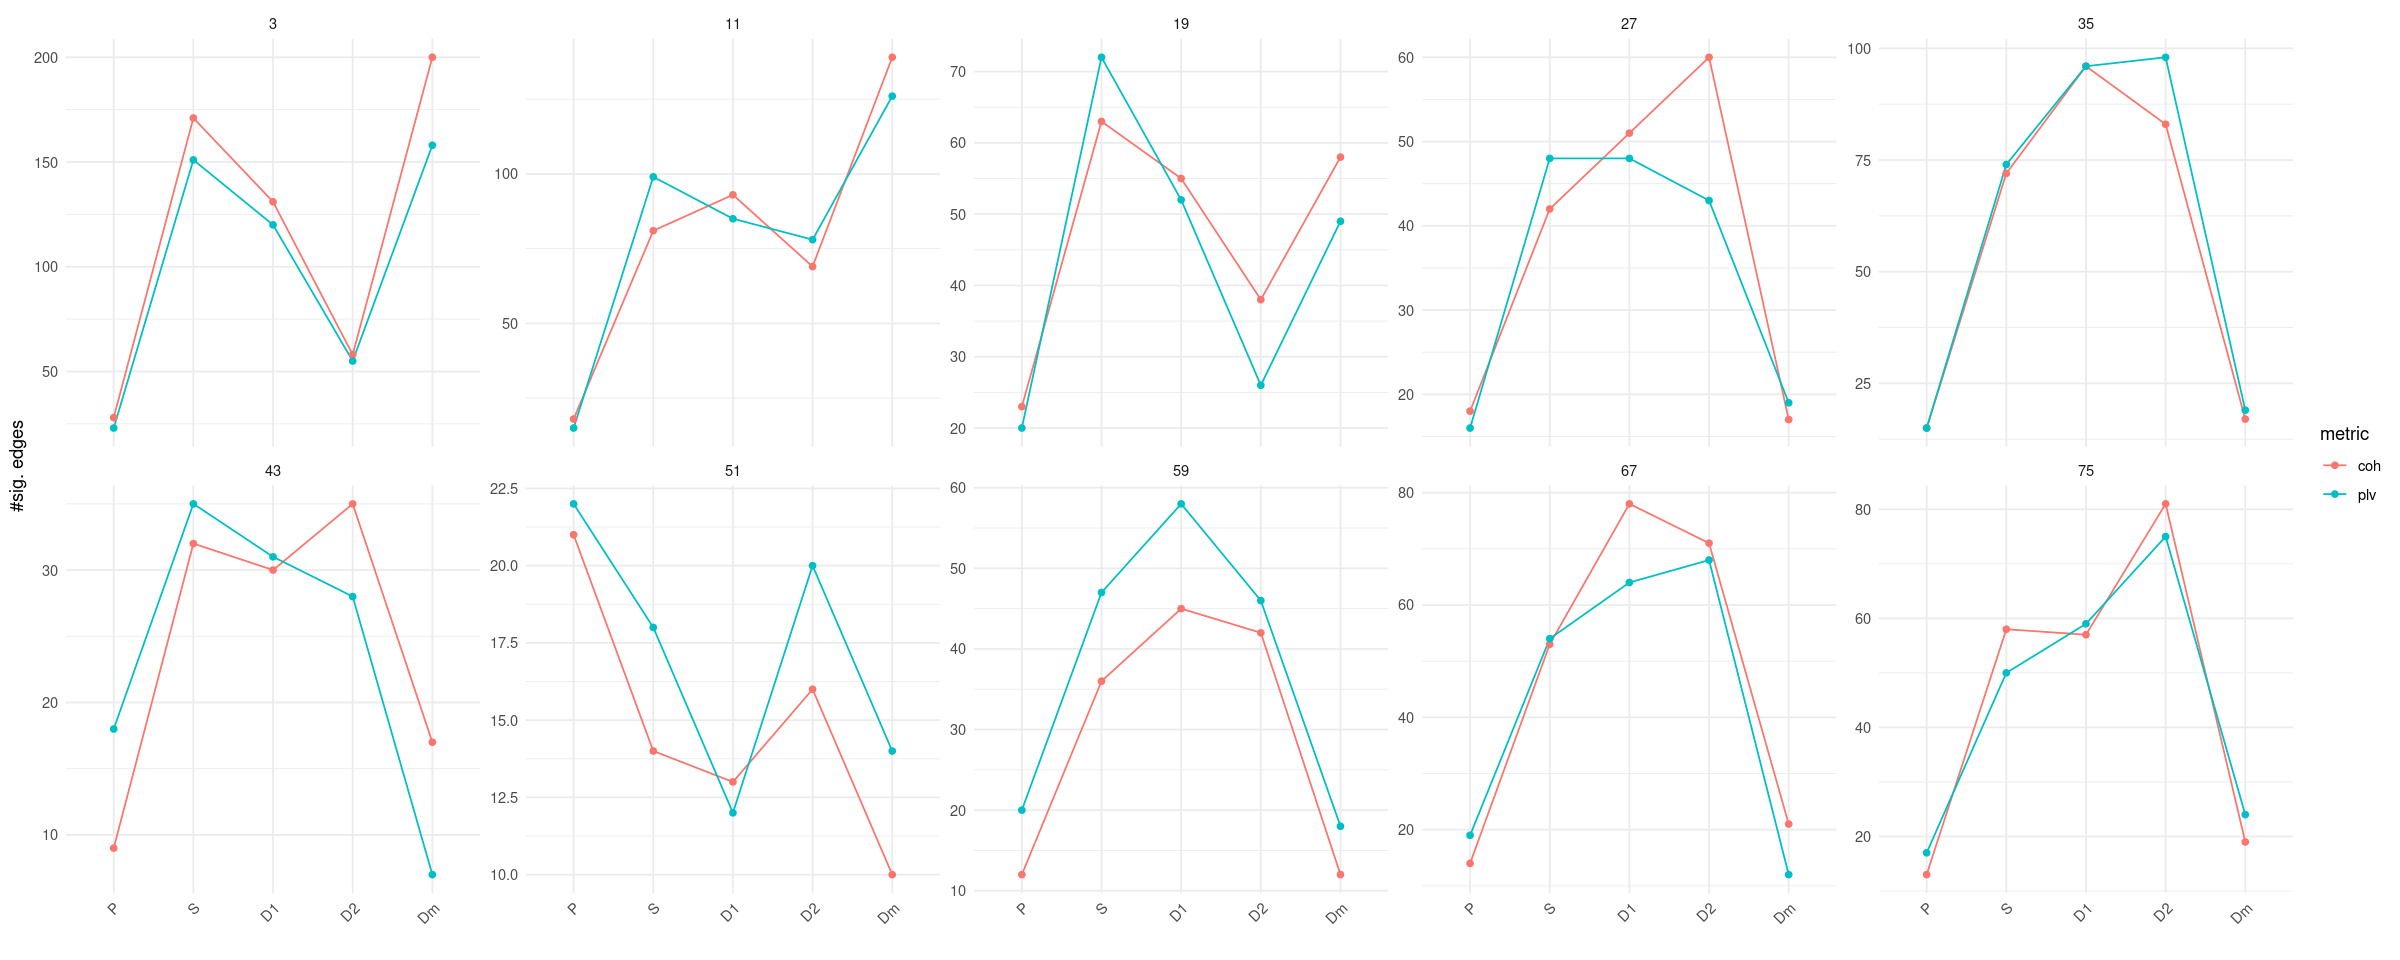

In [3]:
freqs <- unique(df$freqs)
times <- unique(df$times)

n_freqs <- length(freqs)
n_times <- length(times)

neff <- data.frame(matrix(ncol = 4, nrow = 0))
x <- c("freqs", "times", "metric", "n")
colnames(neff) <- x

for(f in freqs) {
  for(t in times) {
    # Filter for a freq and time
    out <- df %>% filter(freqs==f,
                         times==t)
    # Coherence
    neff_coh <- sum(out$coh > 0)
    # PLV
    neff_plv <- sum(out$plv > 0)
    # PEC
    #neff_pec <- sum(out $pec > 0)
    # Row for dataframe
    row <- c(f, t, "coh", neff_coh)
    neff[nrow(neff) + 1,] <- row
    row <- c(f, t, "plv", neff_plv)
    neff[nrow(neff) + 1,] <- row
    #row <- c(f, t, "pec", neff_pec)
    #neff[nrow(neff) + 1,] <- row
  }
}

# Define labels
freqs.labs <- c("3 Hz", "11 Hz", "19 Hz", "27 Hz", "35 Hz",
                "43 Hz", "51 Hz", "59 Hz", "67 Hz", "75 Hz")
names(freqs.labs) <- seq(3, 75, 8)
times.labs <- c("P", "S", "D1", "D2", "Dm")
names(times.labs) <- 0:4

options(repr.plot.width=20, repr.plot.height=8)
neff %>% ggplot(aes(x=as.factor(times), y = as.numeric(n),
                    group=as.factor(metric))) +
  geom_line(aes(color=metric))  + 
  geom_point(aes(color=metric)) + 
  scale_x_discrete(labels=times.labs) +
  theme_minimal() +
  theme(plot.title = element_text(hjust=0.5),
        axis.text.x = element_text(angle = 45, hjust=1)) +
  facet_wrap(~as.numeric(freqs), ncol=5,
             labeller = labeller(freqs = freqs.labs),
             scales = "free_y") +
  labs(x = "", y = "#sig. edges")

In [4]:
ggsave(
  paste(
    c(results,
      "/mi_edge_enconding_nedges.png"),
    collapse = ""),
  width = 12, height = 6)

#### Average effect

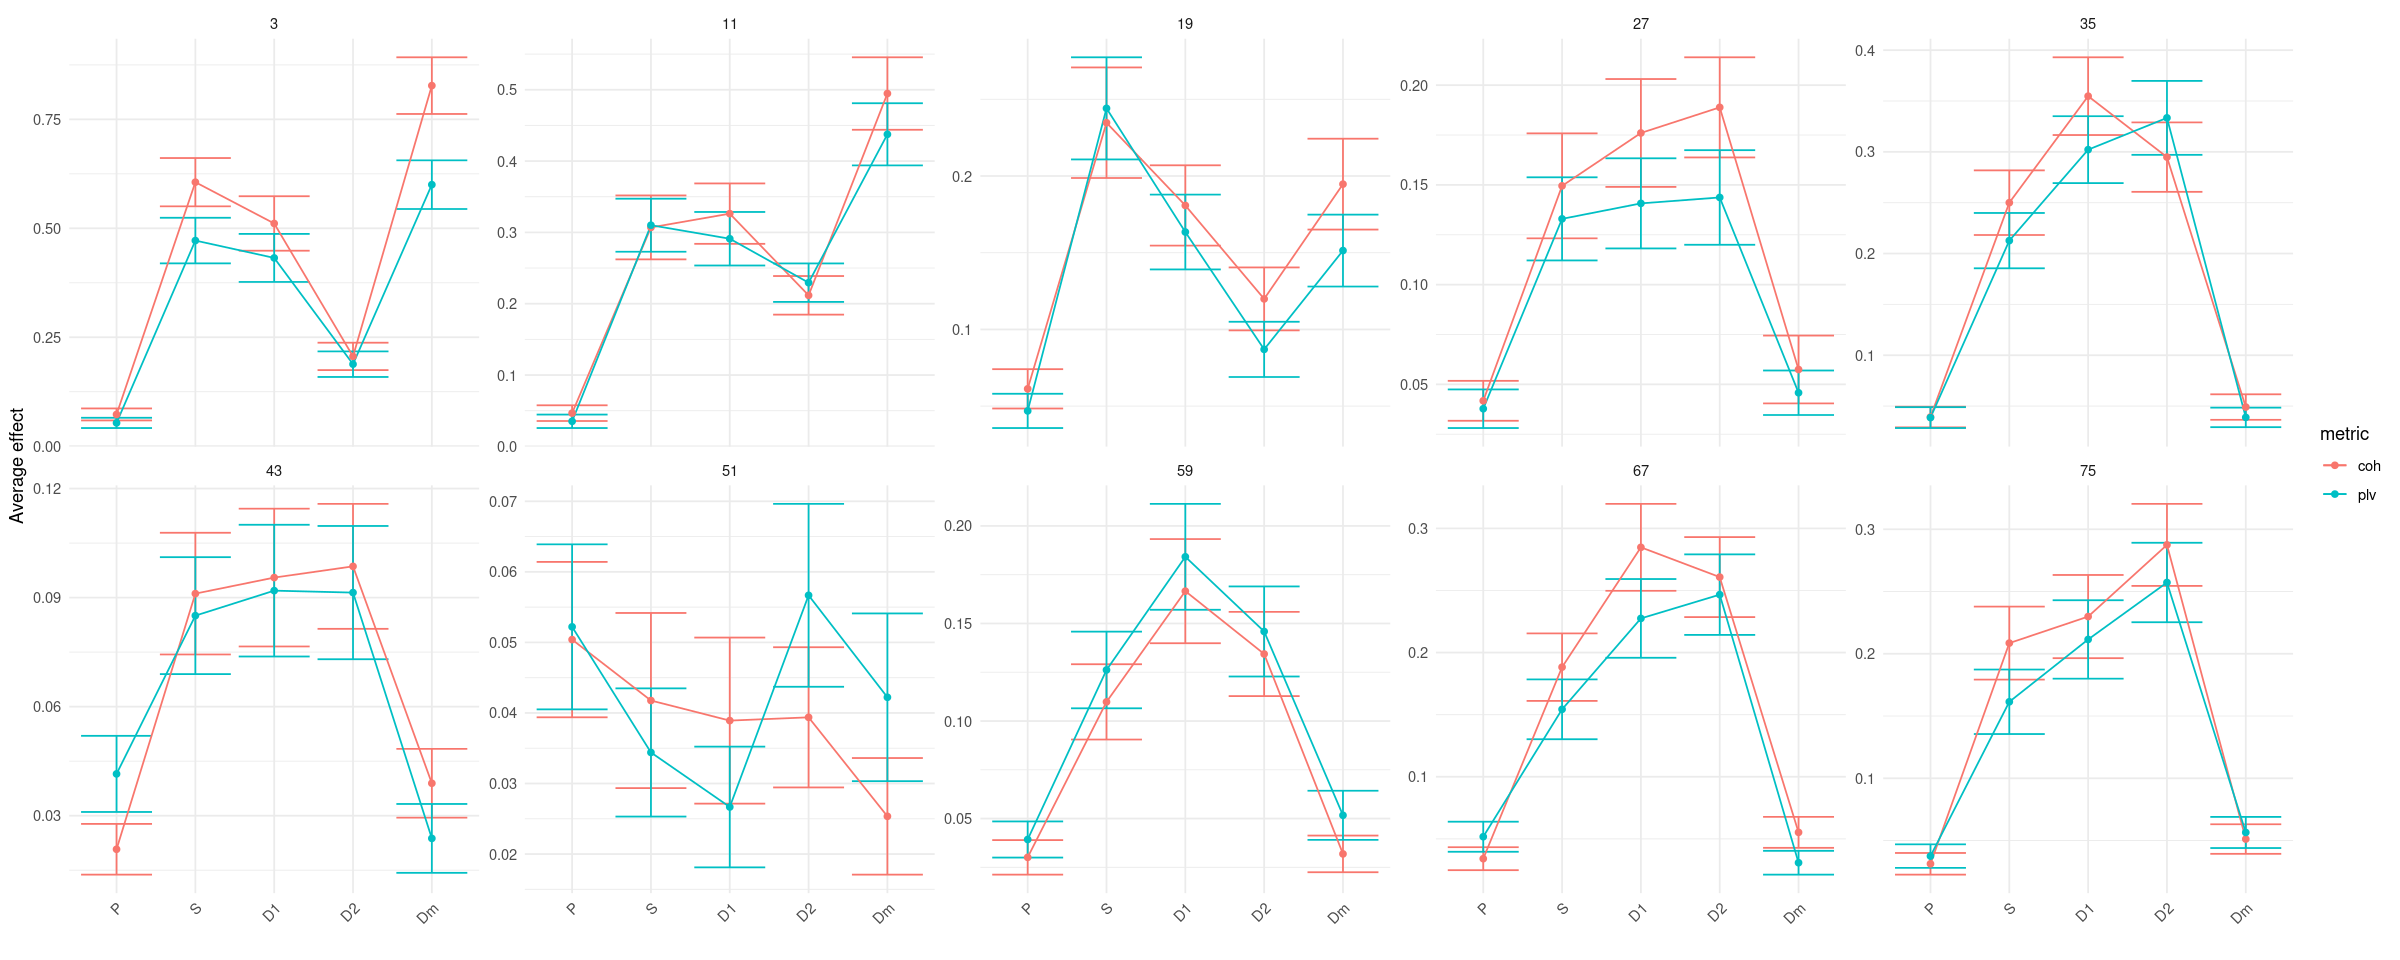

In [5]:
# Function for standard error
se <- function(x) sqrt(var(x) / length(x))

meff <- data.frame(matrix(ncol = 5, nrow = 0))
x <- c("freqs", "times", "metric", "n", "sde")
colnames(meff) <- x
for(f in freqs) {
  for(t in times) {
    # Filter for a freq and time
    out <- df %>% filter(freqs==f,
                         times==t)
    # Coherence
    meff_coh <- mean(out$coh)
    meff_coh_se <- se(out$coh)
    # PLV
    meff_plv <- mean(out$plv)
    meff_plv_se <- se(out$plv)
    # PEC
    #meff_pec <- mean(out $pec)
    #meff_pec_se <- se(out$pec)
    # Row for dataframe
    row <- c(f, t, "coh", meff_coh, meff_coh_se)
    meff[nrow(meff) + 1,] <- row
    row <- c(f, t, "plv", meff_plv, meff_plv_se) 
    meff[nrow(meff) + 1,] <- row
    #row <- c(f, t, "pec", meff_pec, meff_pec_se)
    #meff[nrow(meff) + 1,] <- row
  }
}

options(repr.plot.width=20, repr.plot.height=8)
meff %>% ggplot(aes(x=as.factor(times), y = as.numeric(n),
                    group=as.factor(metric))) +
  geom_errorbar(aes(ymin=as.numeric(n)-as.numeric(sde),
                    ymax=as.numeric(n)+as.numeric(sde), color=metric)) +
  geom_line(aes(color=metric))  + 
  geom_point(aes(color=metric)) + 
  scale_x_discrete(labels=times.labs) +
  theme_minimal() +
  theme(plot.title = element_text(hjust=0.5),
        axis.text.x = element_text(angle = 45, hjust=1)) +
  facet_wrap(~as.numeric(freqs), ncol=5,
             labeller = labeller(freqs = freqs.labs),
             scales = "free_y") +
  labs(x = "", y = "Average effect")

In [6]:
ggsave(
  paste(
    c(results,
      "/mi_edge_enconding_avgeffect.png"),
    collapse = ""),
  width = 12, height = 6)

#### Encoding networks

In [7]:
create_graph <- function(f, t, metric) {
  # Load data
  df = read.csv(
    paste(
      c(root,
        "/Results/lucy/mutual_information/mi_",
        metric,
        "_fdr.csv"),
      collapse="")
  )
  
  idx = (df$freqs == f) & (df$times == t)
  # Filter frequency and time of interest
  df_filt <- df[idx, ]
  
  # Binary network
  weights <- as.numeric(df_filt[metric] > 0)
  # Creating network
  edges <- df_filt %>% select(6:7)
  edges$weights <- unlist(weights)
  edges <- edges %>% 
    rename(from = s,
           to = t)
    
  edges <- edges[order(edges$from), ]
  
  # Create a graph object
  graph <- igraph::graph_from_data_frame( d=edges, directed=F )
  
  strengths <- igraph::strength(graph = graph, weights = edges$weights)
  
  if(t == 0) {
    stage <- "P"
  } else if(t == 1) {
    stage <- "S"
  } else if(t == 2) {
    stage <- "D1"
  } else if(t == 3) {
    stage <- "D2"
  } else {
    stage <- "Dm"
  }
  
  if(f==3) {
    title <- stage
  } else {
    title <- " "
  }
      
  filter <- (edges$weights>0)
  
  p<-ggraph(graph, layout = 'linear', circular = TRUE) + 
    geom_edge_arc(aes(filter=filter),
                  width=.3, color="black",
                  show.legend=F) +
    scale_edge_colour_distiller(palette = "Set1", direction=1,
                                name="", limits=c(0, 20)) +
    geom_node_point(aes(x = x*1.07, y=y*1.07, color=name, size=strengths),
                    show.legend=F,
                    alpha=0.6) +
    geom_node_text(aes(label=name, x=x*1.15, y=y*1.15), color="black",
                   size=2, alpha=1, show.legend=F) +
    theme_void() +
    ggtitle(title) +
    theme(
      plot.title = element_text(hjust = 0.5, size=10),
      plot.margin=unit(c(0,0,0,0),"cm"),
    ) 
  return(p)
}

In [ ]:
################################################################################
# Coherence
################################################################################
myplots <- vector('list', length(times) * length(freqs))
i<-1
for(f in freqs) {
  for(t in times) {
    p1 <- create_graph(f, t, "coh")
    myplots[[i]] <- local({
      i <- i
      print(p1)
    })
    i <- i + 1
  }
}

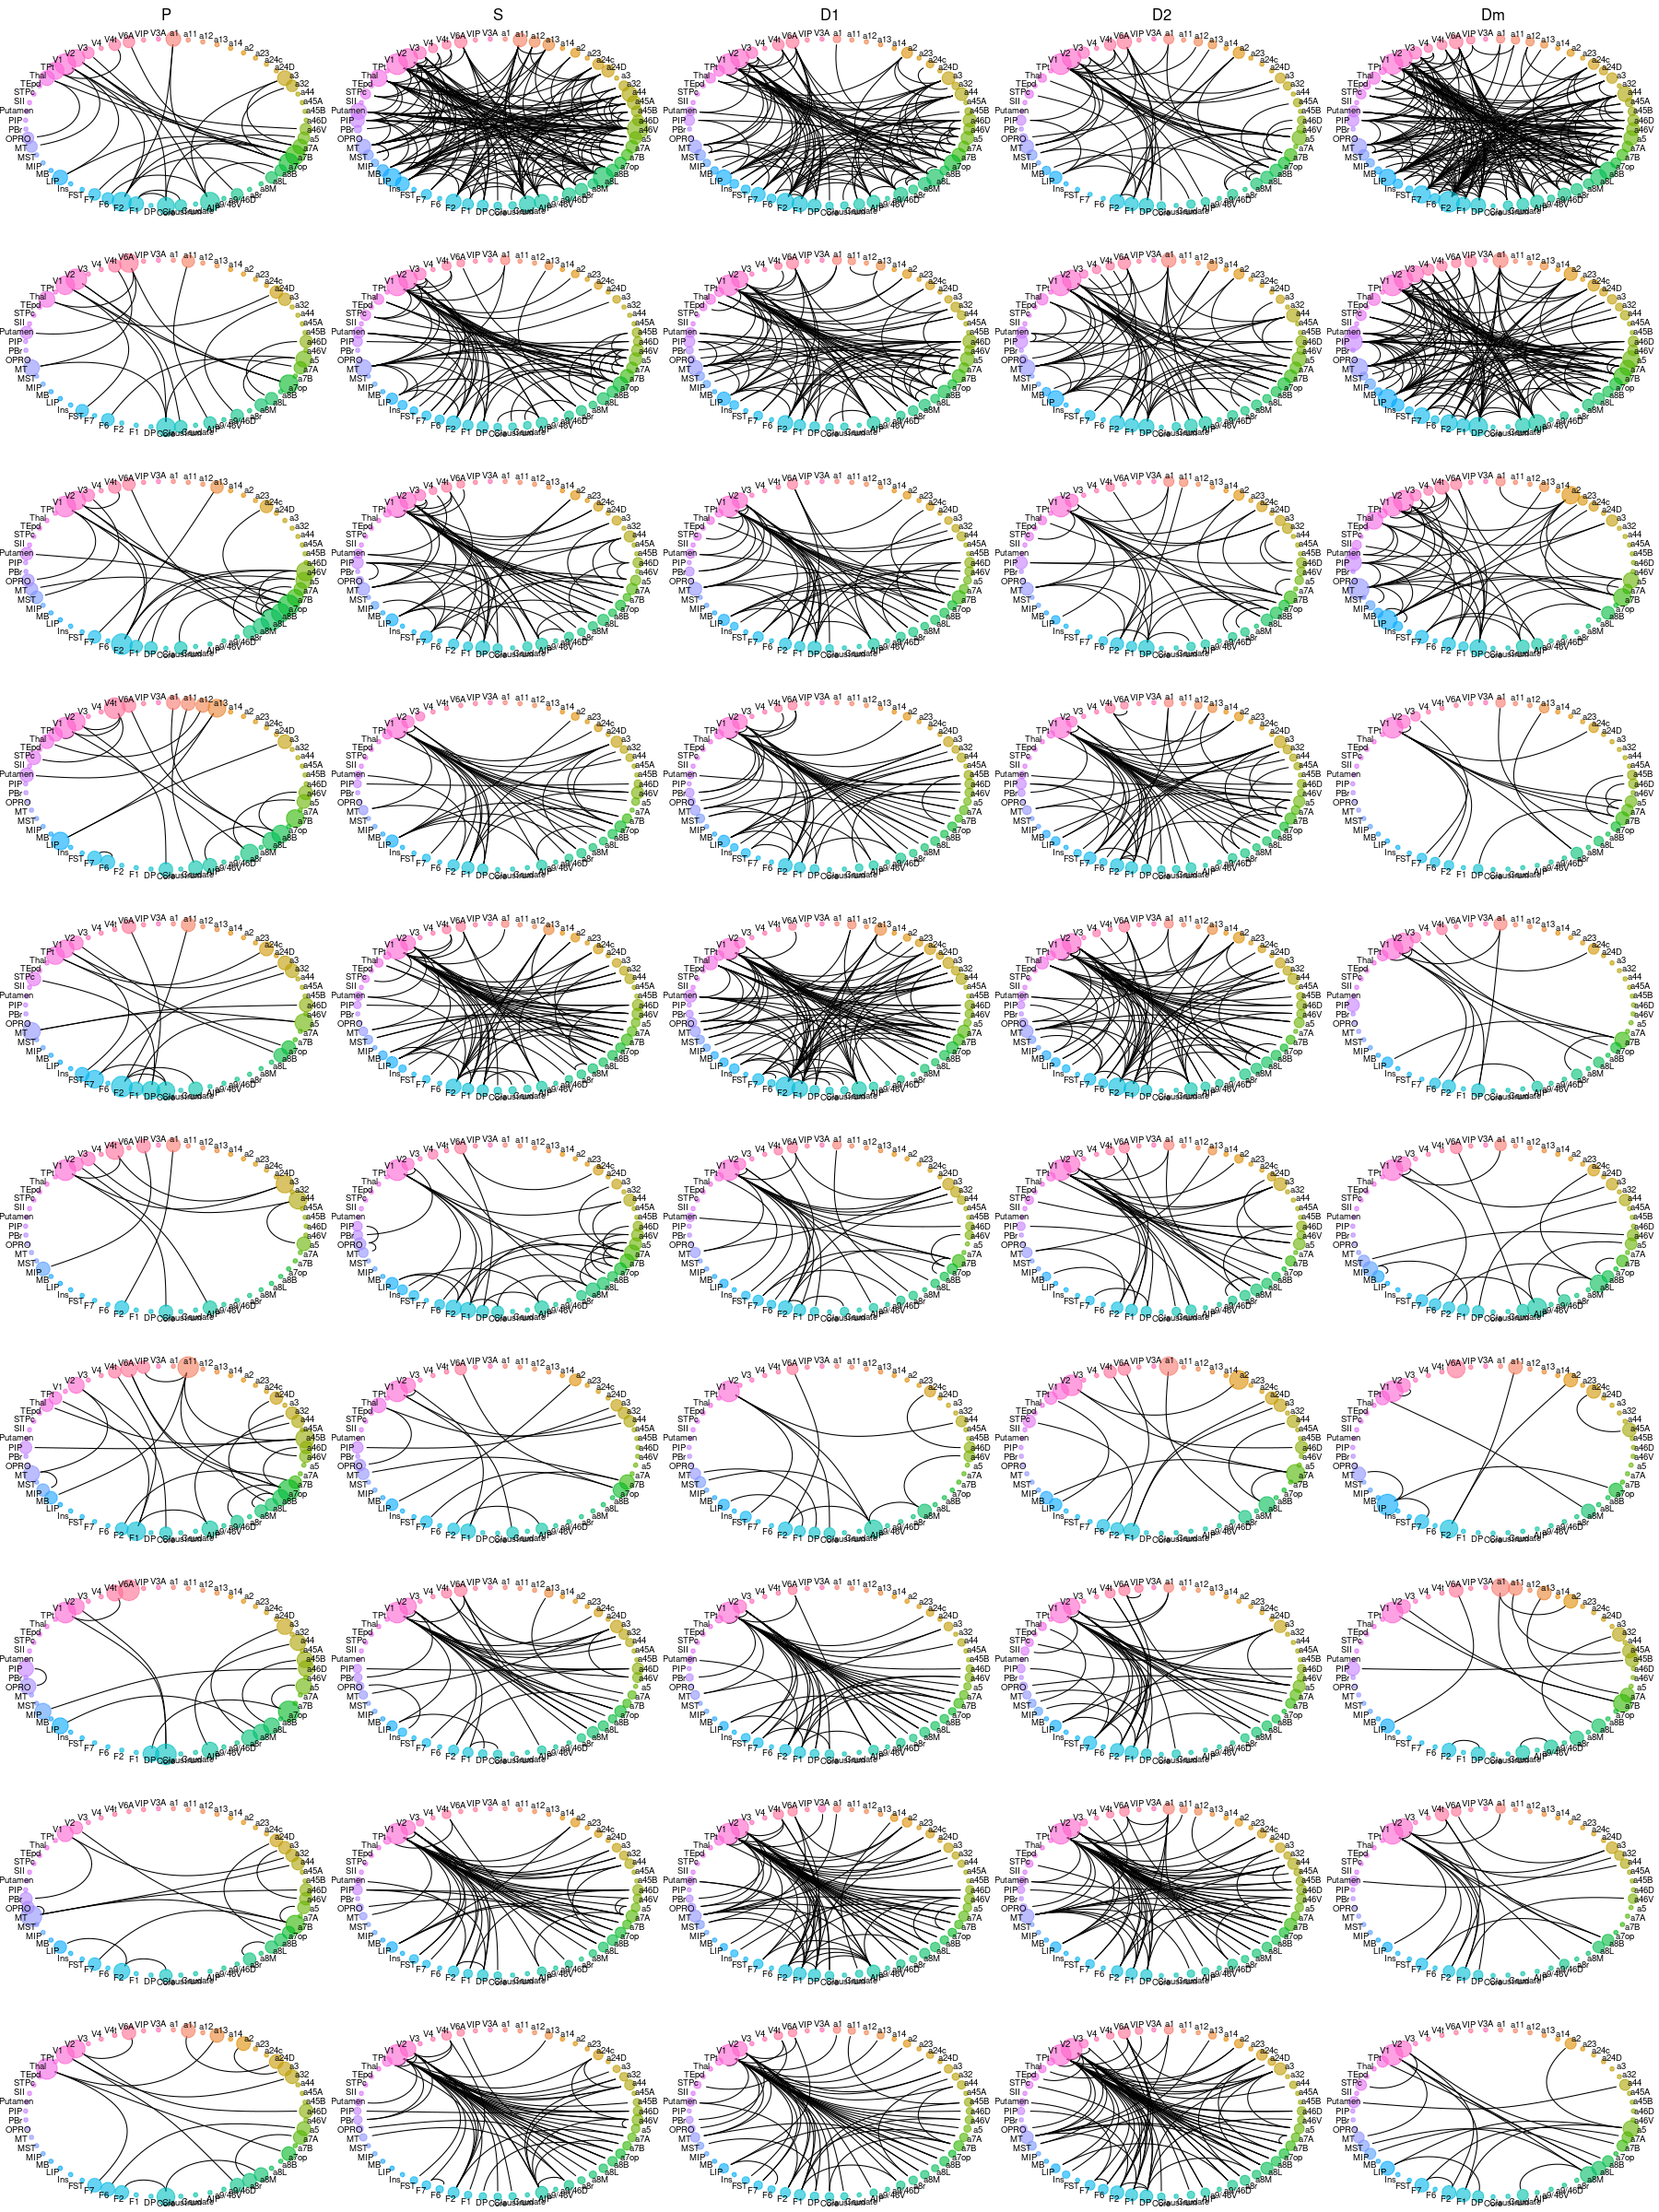

In [9]:
options(repr.plot.width=15, repr.plot.height=20)
ggarrange(plotlist=myplots,
          ncol = n_times, nrow = n_freqs) 

ggsave(
  paste(
    c(results,
      "/mi_edge_enconding_coh_net.png"),
    collapse = ""),
  width = 15, height = 20)

In [ ]:
################################################################################
# PLV
################################################################################
myplots <- vector('list', length(times) * length(freqs))
i<-1
for(f in freqs) {
  for(t in times) {
    p1 <- create_graph(f, t, "plv")
    myplots[[i]] <- local({
      i <- i
      print(p1)
    })
    i <- i + 1
  }
}

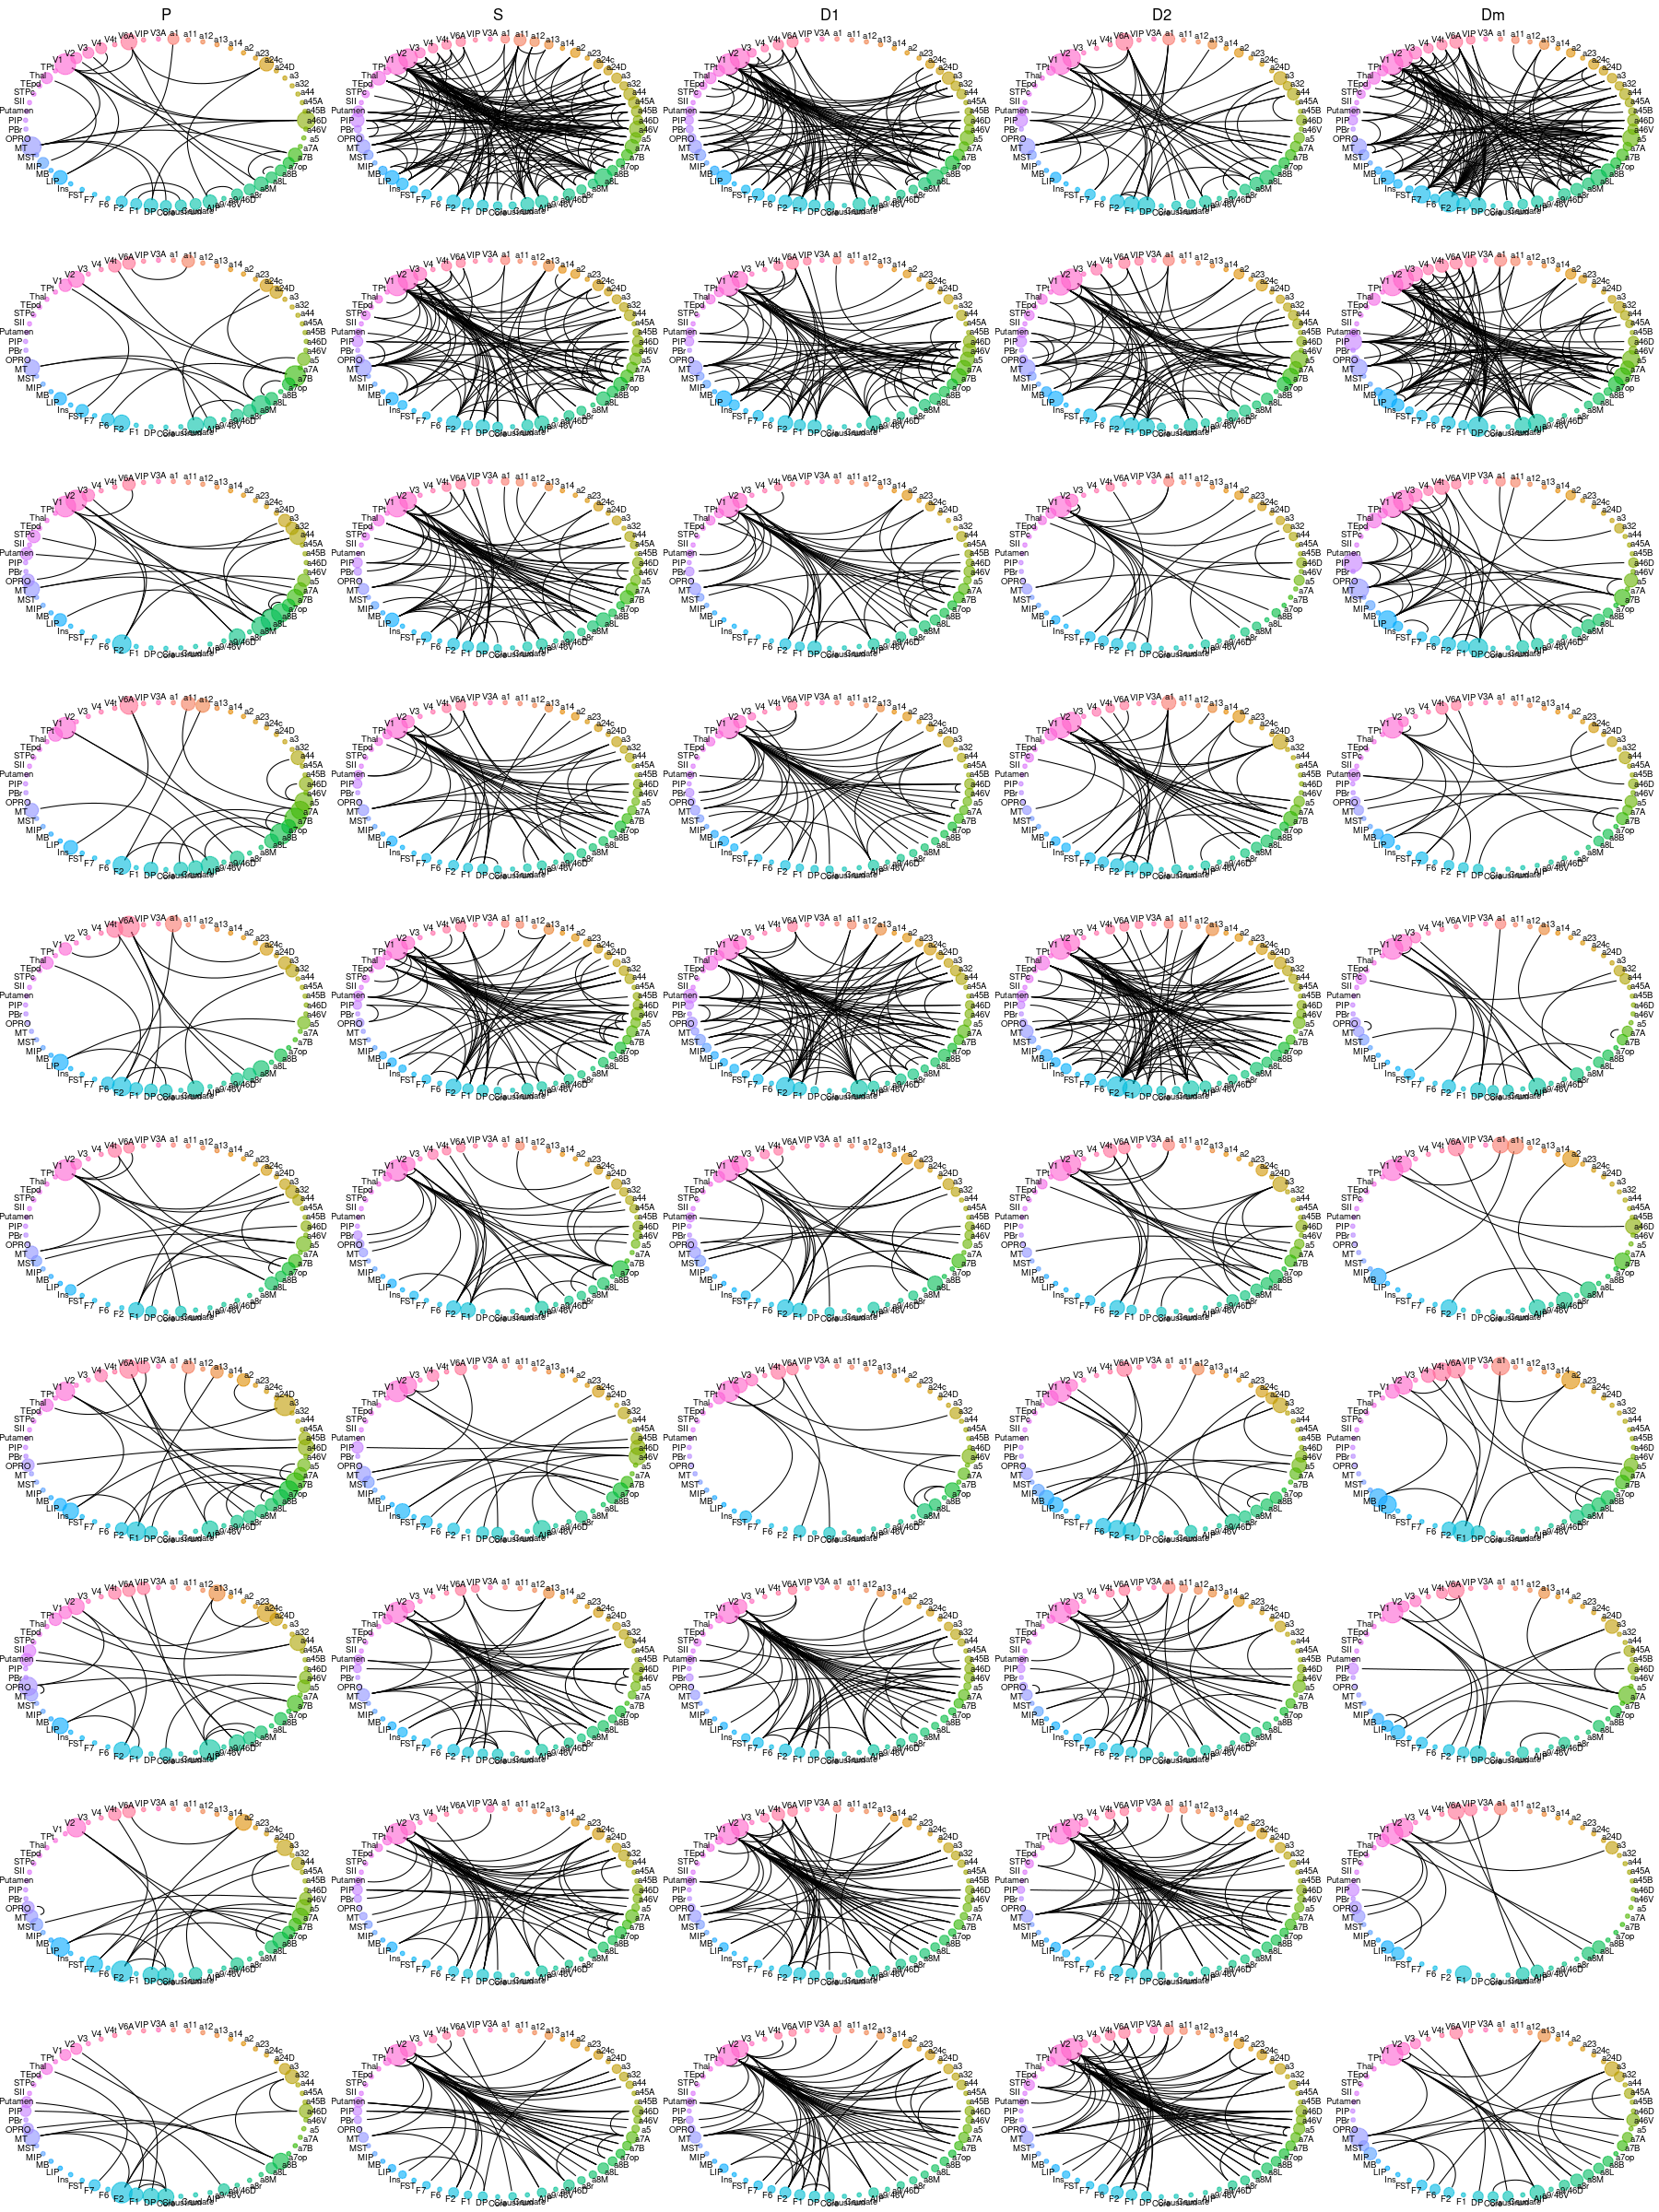

In [11]:
options(repr.plot.width=15, repr.plot.height=20)
ggarrange(plotlist=myplots,
          ncol = n_times, nrow = n_freqs) 

ggsave(
  paste(
    c(results,
      "/mi_edge_enconding_plv_net.png"),
    collapse = ""),
  width = 14, height = 20)

#### Encoding networks + power encoding

In [12]:
# Load-power encoding
power <- read.csv(
  paste(
    c(root, "/Results/lucy/mutual_information/mi_df_coh_fdr.csv"),
    collapse = "")
)[, 1:4]

create_graph <- function(f, t, metric, title) {
  # Load data
  df = read.csv(
    paste(
      c(root,
        "/Results/lucy/mutual_information/mi_",
        metric,
        "_fdr.csv"),
      collapse="")
  )
  
  # Filter frequency and time of interest
  idx = (df$freqs == f) & (df$times == t)
  df_filt <- df[idx, ]
  # Power filtered t-values
  idx_p = (power$freqs == f) & (power$times == t)
  power_filt <- power[idx_p, ]
  
  # Store t_values
  t_values <- unlist(df_filt[metric])
  t_values <- mean(t_values)
  # Binary network
  weights <- unlist(df_filt[metric])
  # Creating network
  edges <- df_filt %>% select(6:7)
  edges$weights <- weights
  edges <- edges %>% 
    rename(from = s,
           to = t)
  
  edges <- edges[order(edges$from),]
  
  rois <- unique(c(as.character(edges$from), as.character(edges$to)))
  n_rois <- length(rois)
  n_pairs <- length(weights)
  
  # Getting power t-values for each ROI
  power_t <- rep(0, n_rois)
  i <- 1
  for(roi in rois) {
    if(roi %in% power_filt$roi) {
      power_t[i] <- power_filt[power_filt$roi==roi, ]$power
    } else {
      power_t[i] <- 0
    }
    i <- i + 1
  }
  
  nodes <- as.data.frame(rois)
  nodes <- nodes %>% rename(id = rois)
  
  # Create a graph object
  graph <- igraph::graph_from_data_frame( d=edges, vertices=nodes, directed=F )
  
  strengths <- igraph::strength(graph = graph, weights = edges$weights)
  
  if(title == T) {
    if(t == 0) {
      title <- "P"
    } else if(t == 1) {
      title <- "S"
    } else if(t == 2) {
      title <- "D1"
    } else if(t == 3) {
      title <- "D2"
    } else {
      title <- "Dm"
    }
  } else {
    title <- ""
  }
  
  if(t==0) {
    ylabel <- paste(c(f, "Hz"),
                    collapse=" ") 
  } else {
    ylabel <- " "
  }
  
  filter <- (edges$weights>0) 
  
  p <- ggraph(graph, layout = 'linear', circular = TRUE) + 
    geom_edge_arc(aes(filter = filter,
                      width = edges$weights,
                      color = edges$weights),
                  show.legend=F) +
    scale_edge_color_continuous(low = "white", high = "blue",
                                na.value="blue", limits = c(0, 10)) +
    scale_edge_width_continuous(range = c(0,3), limits = c(0, 10)) +
    geom_node_point(aes(x = x*1.07, y=y*1.07,color=power_t+1e-10),
                    size=power_t / 2,
                    alpha=0.6, show.legend=F) +
    geom_node_text(aes(label=rois, x=x*1.15, y=y*1.15),
                   color="black",
                   size=2, alpha=1, show.legend=F) +
    theme_void() +
    ggtitle(title) +
    ylab(ylabel) +
    theme(
      plot.title = element_text(hjust = 0.5, size=10),
      plot.margin=unit(c(0,0,0,0),"cm"),
    ) 
  return(p)
}

In [ ]:
count <- 1
for(f in freqs) {
  myplots <- vector('list', length(times) * 2)
  i <- 1
  for(t in 0:4) {
    p1 <- create_graph(f, t, "coh", T)
    myplots[[i]] <- local({
      i <- i
      print(p1)
    })
    i <- i + 1
  }
  
  for(t in 0:4) {
    p1 <- create_graph(f, t, "plv", F)
    myplots[[i]] <- local({
      i <- i
      print(p1)
    })
    i <- i + 1
  }
  
  plot <- ggarrange(plotlist=myplots,
                    ncol =length(times), nrow = 2,
                    labels = c("A", " ", " ", " ", " ",
                               "B", " ", " ", " ", " ")) 
  
  title <- paste(c("Enconding netoworks, band ", count), collapse = "")
  annotate_figure(plot, top = text_grob(title, 
                                        color = "black", face = "bold", size = 14))
  
  ggsave(
    paste(
      c(results,
        "/mi_edge_power_encoding_", count,".png"),
      collapse = ""),
    width = 18, height = 6)
  
  count <- count + 1 
}

#### Encoding networks + trimmer strengths

In [14]:
# Load trimmer-strengths encoding
TS <- read.csv(
  paste(
    c(root, "/Results/lucy/meta_conn/ts_coh.csv"),
    collapse = "")
)[, 2:5]

create_graph <- function(f, t, metric, title) {
  # Load data
  df = read.csv(
    paste(
      c(root,
        "/Results/lucy/mutual_information/mi_",
        metric,
        "_fdr.csv"),
      collapse="")
  )
  
  # Filter frequency and time of interest
  idx = (df$freqs == f) & (df$times == t)
  df_filt <- df[idx, ]
  # Filter trimmer-strengts for time and freq
  idx_p = (TS$freqs == f) & (TS$times == t)
  ts_filt <- TS[idx_p, ]
  
  # Get weights
  weights <- unlist(df_filt[metric])
  # Creating network
  edges <- df_filt %>% select(6:7)
  edges$weights <- weights
  edges <- edges %>% 
    rename(from = s,
           to = t)
  
  edges <- edges[order(edges$from),]
  
  rois <- unique(c(as.character(edges$from), as.character(edges$to)))
  n_rois <- length(rois)
  n_pairs <- length(weights)
  
  # Getting trimme-strength for each ROI
  ts_t <- rep(0, length(rois))
  i <- 1
  for(roi in rois) {
    if(roi %in% ts_filt$roi) {
      ts_t[i] <- ts_filt[ts_filt$roi==roi, ]$ts
    } else {
      ts_t[i] <- 0
    }
    i <- i + 1
  }
  
  nodes <- as.data.frame(rois)
  nodes <- nodes %>% rename(id = rois)
  
  # Create a graph object
  graph <- igraph::graph_from_data_frame( d=edges, vertices=nodes, directed=F )
  
  strengths <- igraph::strength(graph = graph, weights = edges$weights)
  
  if(title == TRUE) {
    if(t == 0) {
      title <- "P"
    } else if(t == 1) {
      title <- "S"
    } else if(t == 2) {
      title <- "D1"
    } else if(t == 3) {
      title <- "D2"
    } else {
      title <- "Dm"
    }
  } else {
    title <- ""
  }
  
  if(t==0) {
    ylabel <- paste(c(f, "Hz"),
                    collapse=" ") 
  } else {
    ylabel <- " "
  }
  
  filter <- (edges$weights>0) 
      
  ts_t <- ( ts_t / max(ts_t) ) ^ 2
  
  p <- ggraph(graph, layout = 'linear', circular = TRUE) + 
    geom_edge_arc(aes(filter = filter,
                      width = edges$weights,
                      color = edges$weights),
                  show.legend=F) +
    scale_edge_color_continuous(low = "white", high = "blue",
                                na.value="blue", limits = c(0, 10)) +
    scale_edge_width_continuous(range = c(0,3), limits = c(0, 10)) +
    geom_node_point(aes(x = x*1.07, y=y*1.07),
                    size=10 * ts_t, color="blue",
                    alpha=0.6, show.legend=F) +
    geom_node_text(aes(label=rois, x=x*1.15, y=y*1.15),
                   color="black",
                   size=2, alpha=1, show.legend=F) +
    theme_void() +
    ggtitle(title) +
    ylab(ylabel) +
    theme(
      plot.title = element_text(hjust = 0.5, size=10),
      plot.margin=unit(c(0,0,0,0),"cm"),
    ) 
  return(p)
}

In [ ]:
count <- 1
for(f in freqs) {
  myplots <- vector('list', length(times) * 2)
  i <- 1
  for(t in 0:4) {
    p1 <- create_graph(f, t, "coh", T)
    myplots[[i]] <- local({
      i <- i
      print(p1)
    })
    i <- i + 1
  }
  
  for(t in 0:4) {
    p1 <- create_graph(f, t, "plv", F)
    myplots[[i]] <- local({
      i <- i
      print(p1)
    })
    i <- i + 1
  }
  
  plot <- ggarrange(plotlist=myplots,
                    ncol =length(times), nrow = 2,
                    labels = c("A", " ", " ", " ", " ",
                               "B", " ", " ", " ", " ")) 
  
  title <- paste(c("Enconding netoworks, band ", count), collapse = "")
  annotate_figure(plot, top = text_grob(title, 
                                        color = "black", face = "bold", size = 14))
  
  ggsave(
    paste(
      c(results,
        "/mi_edge_trimmer_encoding_", count,".png"),
      collapse = ""),
    width = 18, height = 6)
  
  count <- count + 1 
}

#### Trimmer-strength distributions

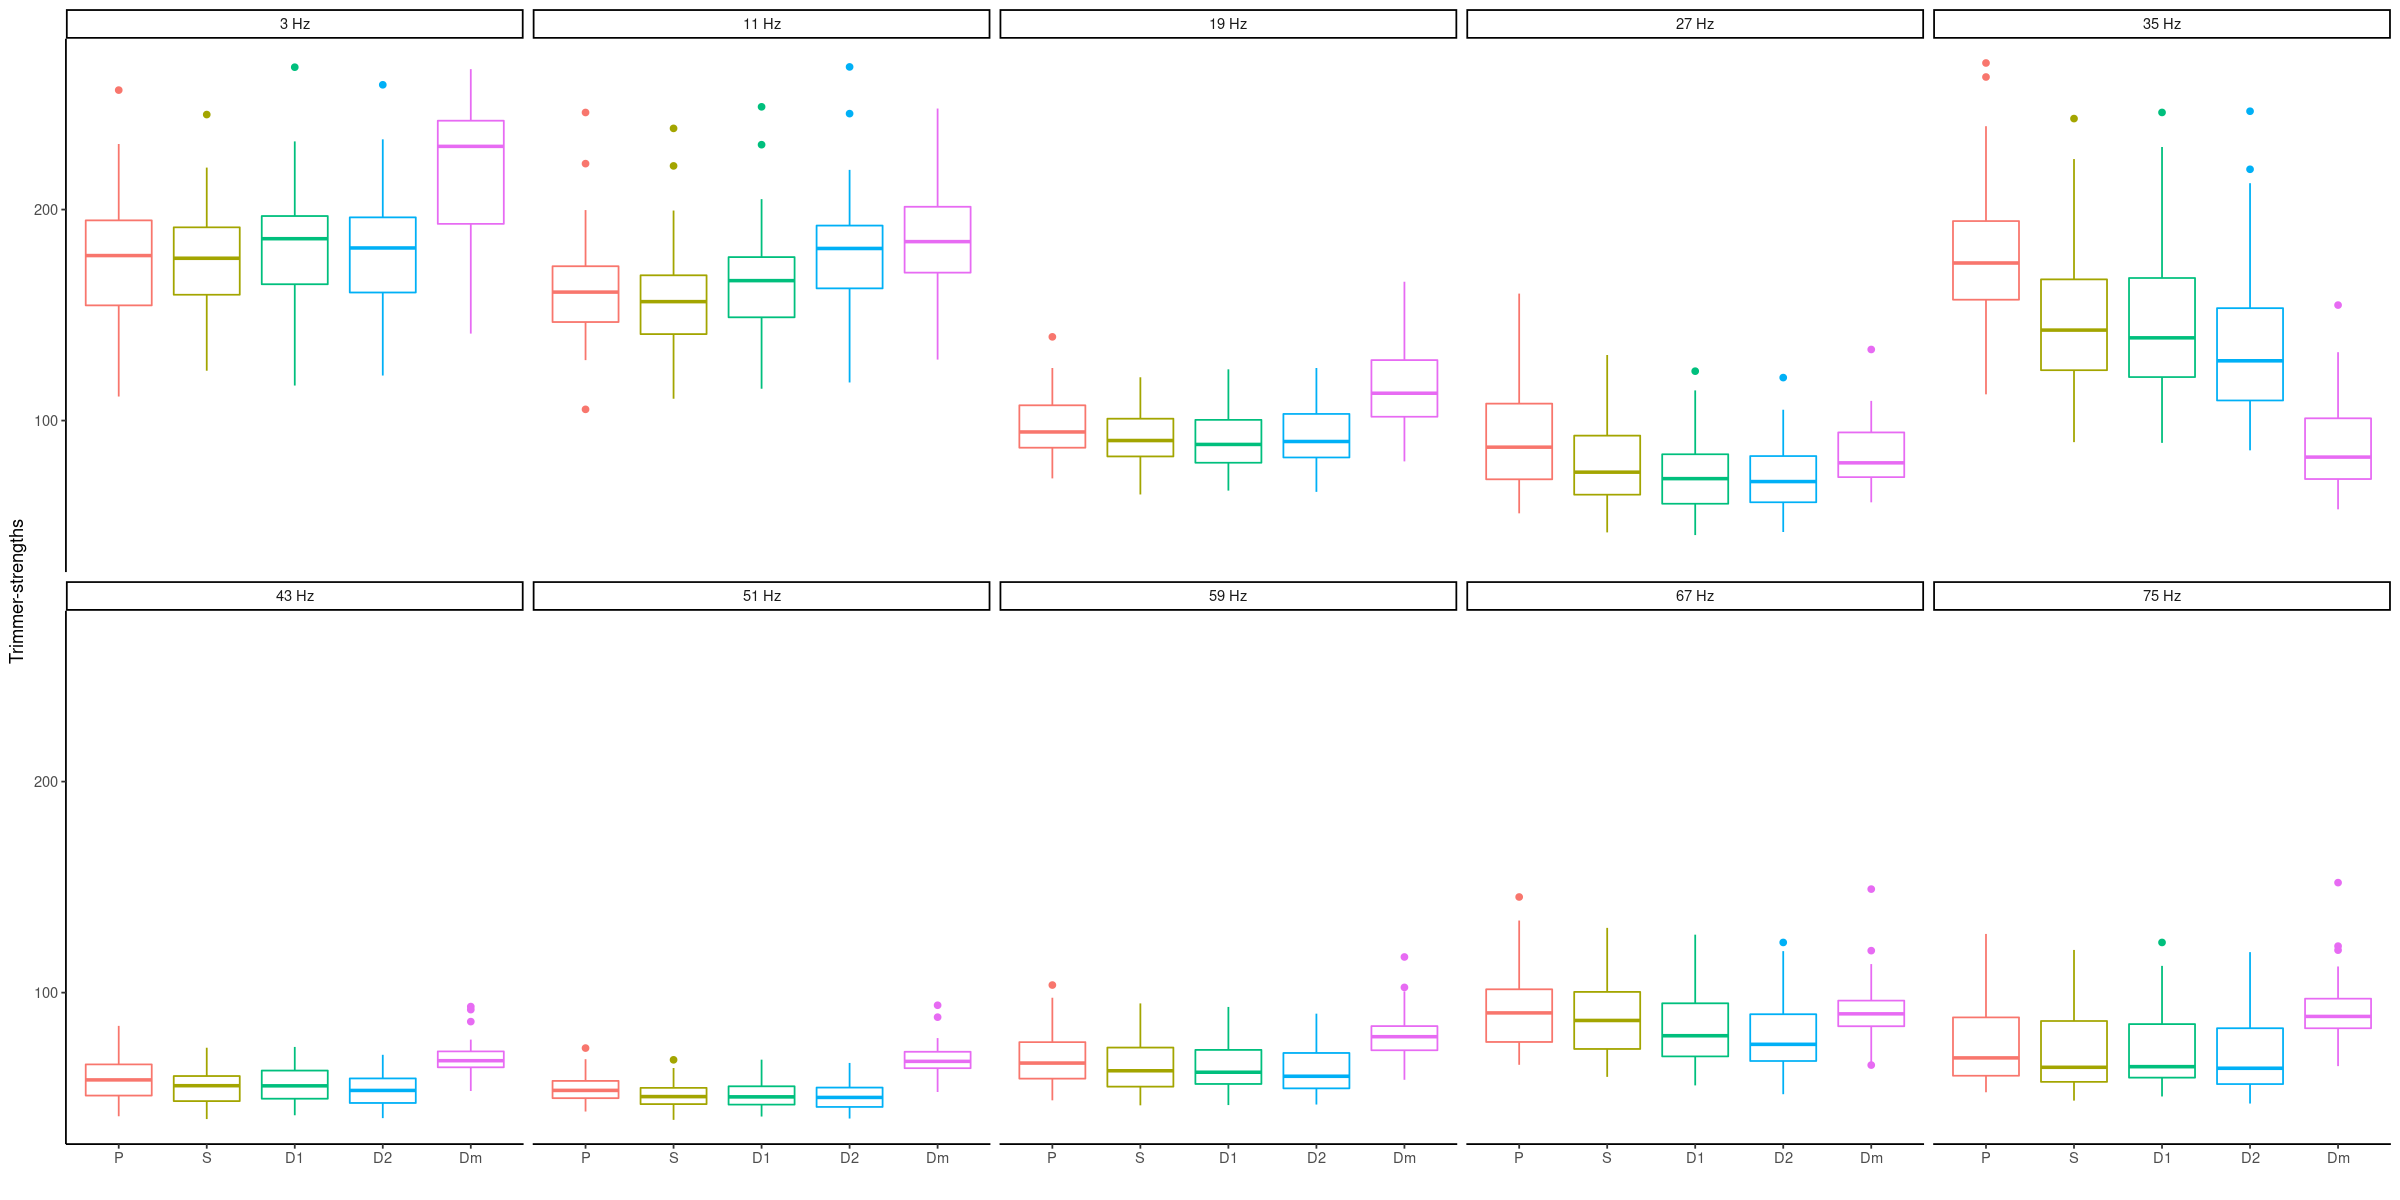

In [16]:
# Define labels
freqs.labs <- c("3 Hz", "11 Hz", "19 Hz", "27 Hz", "35 Hz",
                "43 Hz", "51 Hz", "59 Hz", "67 Hz", "75 Hz")
names(freqs.labs) <- as.character(unique(neff$freqs))

times.labs <- c("P", "S", "D1", "D2", "Dm")
names(times.labs) <- 0:4

TS <- read.csv(
  paste(
    c(root, "/Results/lucy/meta_conn/ts_coh.csv"),
    collapse = "")
)[, 2:5]

options(repr.plot.width=20, repr.plot.height=10)
TS %>% ggplot(aes(x=as.factor(times), y=ts, color = as.factor(times))) + 
       geom_boxplot() +
       scale_x_discrete(labels=times.labs) +
       facet_wrap(~freqs, ncol=5, 
                  labeller = labeller(freqs = freqs.labs)) +
       labs(x = "", y = "Trimmer-strengths") + 
       theme_classic() +
       theme(legend.position = "none")